# Rafael Rodríguez Vázquez - Prueba técnica Overstand Intelligence

**El equipo de Overstand Intelligence me pide realizar un sistema de recomendacion de libros, para ello me aportan 3 csv con datos acerca de usuarios, libros y sus calificaciones.**

Para desarrollar el proyecto vamos a seguir los siguientes pasos:
- 1. Visualizacion y procesamiento de datos
- 2. Creacion de conjuntos de datos y entrenamiento, prediccion y evaluacion del modelo
- 3. Funcion de recomendacion y validacion de recomendaciones

Finalizaremos con una comprobacion de si, el sistema generado, es efectivo.

## 1. Visualización y pre-procesamiento de datos

In [1]:
# Importamos la libreria Pandas, para la visualización y el procesamiento de los datos del csv
import pandas as pd

# Establecemos variables para que sea mas sencillo visualizar y tratar los datos
books = pd.read_csv("Books.csv")
users = pd.read_csv("Users.csv")
ratings = pd.read_csv("Ratings.csv")

C:\Users\Kocxi\AppData\Local\Temp\ipykernel_16184\3628172562.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


In [2]:
# Visualizamos nuestros datos
print("Books:\n")
print(books.info())
print("\nUsers:\n")
print(users.info())
print("\nRatings:\n")
ratings.info()

Books:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

Users:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1

**Del csv book eliminaremos los elementos que no nos son necesarios para el ejercicio (Publisher, Images S-M-L) los otros no lo son tanto, pero los dejaremos por tener algo de informacion, por si fuese necesario.**

**De users, modificaremos la edad para que no haya valores nulos.**

**Rating no es necesario modificar nada, ya que la variable book-ratings es el dato de interes importante.**

In [3]:
# Eliminamos las columnas que nos son irrelevantes
if "Publisher" in books.columns:
    books = books.drop(["Publisher", "Image-URL-S", "Image-URL-M", "Image-URL-L"], axis=1)  
else:
    print("Cambio ya realizado")

books

,ISBN,Book-Title,Book-Author,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999
...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004
271358,0192126040,Republic (World's Classics),Plato,1996


In [4]:
# Calculamos la media para la columna Age, y la incorporamos como valor para rellenar los nulos.
age_mean = users["Age"].mean()

users["Age"].fillna(age_mean, inplace=True)
users["Age"] = users["Age"].astype(int)

users

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34
...,...,...,...
278853,278854,"portland, oregon, usa",34
278854,278855,"tacoma, washington, united kingdom",50
278855,278856,"brampton, ontario, canada",34
278856,278857,"knoxville, tennessee, usa",34


In [5]:
# Visualizamos el archivo ratings
ratings

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


**Para continuar trbajando en nuestros datos, vamos a unir los dataframes en uno solo con las características que nos interesan**

In [6]:
# Unimos ratings con books a través de ISBN
data = pd.merge(ratings, books, on="ISBN")

# Unimos ratings con users a través de Users-ID
data = pd.merge(data, users, on="User-ID")

# Ordenamos nuestro df resultante y reestructuramos el indice
data.sort_values(by=["User-ID", "ISBN"], inplace=True)
data.reset_index(drop=True, inplace=True)

# Visualizamos nuestro nuevo dataframe
data

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Location,Age
0,2,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,"stockton, california, usa",18
1,8,0002005018,5,Clara Callan,Richard Bruce Wright,2001,"timmins, ontario, canada",34
2,8,0060973129,0,Decision in Normandy,Carlo D'Este,1991,"timmins, ontario, canada",34
3,8,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,"timmins, ontario, canada",34
4,8,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,"timmins, ontario, canada",34
...,...,...,...,...,...,...,...,...
1031131,278854,0425163393,7,Kat Scratch Fever (Kat Colorado Mysteries),Karen Kijewski,1998,"portland, oregon, usa",34
1031132,278854,0515087122,0,The Cat Who Ate Danish Modern (Cat Who... (Pap...,Lilian Jackson Braun,1990,"portland, oregon, usa",34
1031133,278854,0553275739,6,In Her Day,Rita Mae Brown,1988,"portland, oregon, usa",34
1031134,278854,0553578596,0,Wicked Fix : A Home Repair is Homicide Mystery...,SARAH GRAVES,2000,"portland, oregon, usa",34


**Vamos a establecer un modelo que nos permita unir las similitudes entre los usuarios y sus calificaciones, en este caso hemos seleccionado KNN, pero antes de ello vamos a preparar el dataframe [data], de modo que sea apto para el modelaje.**

In [7]:
# Vamos a transformar la columna location a variable categorica utilizando el encoder de SK-Learn
from sklearn.preprocessing import LabelEncoder

# Establecemos los datos relevantes para el modelo
data_features = data[["User-ID","ISBN","Location","Age","Book-Rating"]].copy()

# Inicializamos para usar label encoder
label_encoder=LabelEncoder()

# Generamos la codifciacion
data_features["Location_encoded"] = label_encoder.fit_transform(data_features["Location"])
data_features["ISBN_encoded"] = label_encoder.fit_transform(data_features["ISBN"])

# Mostramos los cambios para location, para reflejar como actúa
print("Asignacion de un numero a cada localizacion:\n\n",data_features[["Location", "Location_encoded"]])

# Nombramos las columnas como encoded para diferenciarla
data_features["Location"] = data_features["Location_encoded"]
data_features["ISBN"] = data_features["ISBN_encoded"]


# Renombramos la columna de Location a Location_encd y ISBN a ISBN_encoded para saber que se ha modificado 
# y borramos la column que origino el encoder
data_features.rename(columns={"Location":"Location_encd"}, inplace=True)
data_features.rename(columns={"ISBN":"ISBN_encd"}, inplace=True)

data_features.drop(columns=["Location_encoded"], inplace=True)
data_features.drop(columns=["ISBN_encoded"], inplace=True)
# Visualizamos como quedaria el df para establecer el modelo
data_features

Asignacion de un numero a cada localizacion:

                           Location  Location_encoded
0        stockton, california, usa             19186
1         timmins, ontario, canada             19911
2         timmins, ontario, canada             19911
3         timmins, ontario, canada             19911
4         timmins, ontario, canada             19911
...                            ...               ...
1031131      portland, oregon, usa             15917
1031132      portland, oregon, usa             15917
1031133      portland, oregon, usa             15917
1031134      portland, oregon, usa             15917
1031135      portland, oregon, usa             15917

[1031136 rows x 2 columns]


,User-ID,ISBN_encd,Location_encd,Age,Book-Rating
0,2,24927,19186,18,0
1,8,73,19911,34,5
2,8,8175,19911,34,0
3,8,59963,19911,34,0
4,8,71447,19911,34,0
...,...,...,...,...,...
1031131,278854,81798,15917,34,7
1031132,278854,107646,15917,34,0
1031133,278854,118016,15917,34,6
1031134,278854,121631,15917,34,0


**A continuacion, vamos a realizar la normalizacion de los datos para mejorar el rendimiento del modelo a la hora de entrenar.**

In [8]:
# Para establecer la normalizacion en los datos vamos a utilizar una funcion de la libreria scikit-learn:
from sklearn.preprocessing import MinMaxScaler

# Inicializamos el scaler
scaler = MinMaxScaler()

# dividimos nuestros datos en dos conjuntos X e y
X = data_features.drop(columns=["Book-Rating"])
y = data_features["Book-Rating"]

# Comprobamos nuestras divisiones de conjuntos
print("Conjunto 'X' sin las calificaciones:\n\n",X)
print("\nConjunto 'y' con las calificaciones unicamente:\n\n",y)

# Aplicamos la normalizacion solo para el conjunto de datos X
X_norm = scaler.fit_transform(X)

# Convertimos nuevamente en df
X_norm = pd.DataFrame(X_norm, columns=X.columns)

# Mostramos los datos normalizados
print("\nConjunto 'X' sin calificaciones y normalizado:\n")
X_norm

Conjunto 'X' sin las calificaciones:

          User-ID  ISBN_encd  Location_encd  Age
0              2      24927          19186   18
1              8         73          19911   34
2              8       8175          19911   34
3              8      59963          19911   34
4              8      71447          19911   34
...          ...        ...            ...  ...
1031131   278854      81798          15917   34
1031132   278854     107646          15917   34
1031133   278854     118016          15917   34
1031134   278854     121631          15917   34
1031135   278854     121696          15917   34

[1031136 rows x 4 columns]

Conjunto 'y' con las calificaciones unicamente:

 0          0
1          5
2          0
3          0
4          0
          ..
1031131    7
1031132    0
1031133    6
1031134    0
1031135    8
Name: Book-Rating, Length: 1031136, dtype: int64

Conjunto 'X' sin calificaciones y normalizado:



,User-ID,ISBN_encd,Location_encd,Age
0,0.000000,0.092271,0.853508,0.073770
1,0.000022,0.000270,0.885760,0.139344
2,0.000022,0.030261,0.885760,0.139344
3,0.000022,0.221962,0.885760,0.139344
4,0.000022,0.264472,0.885760,0.139344
...,...,...,...,...
1031131,1.000000,0.302787,0.708083,0.139344
1031132,1.000000,0.398468,0.708083,0.139344
1031133,1.000000,0.436854,0.708083,0.139344
1031134,1.000000,0.450235,0.708083,0.139344


**Con los datos ya normalizados y correctamente separados, continuamos con su division para los conjuntos de prueba y test.**

**Por lo tanto damos por concluido el proceso de visualizacion y manipulacion de los datos.**

## 2. Creacion de conjuntos de datos y entrenamiento, prediccion y evaluacion del modelo

In [9]:
# Tanto para la division de datos como para la ejecucion y eleccion del modelo y ver sus metricas, importamos:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Vamos a dividir nuestros datos en conjuntos con train_test_split (20% de los datos para test)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.20, random_state=42)

# Mostramos la forma de nuestros conjuntos
print("Forma de los conjuntos:\n",X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Con nuestros datos divididos, procedemos a aplicar y entrenar el algoritmo de nuestro modelo (KNN)

n_neighbors = 10 # Tras varias pruebas determinamos que este valor de (nK) es el optimo para nuestro modelo

model_knn = KNeighborsClassifier(n_neighbors)

# aplicamos validacion cruzada, para mejorar un poco el rendimiento del modelo
cross_validation = cross_val_score(model_knn, X_train, y_train, cv=5) # validacion cruzada de 5 dimensiones, algo estandar

model_knn.fit(X_train, y_train)

Forma de los conjuntos:
 (824908, 4) (206228, 4) (824908,) (206228,)


KNeighborsClassifier(n_neighbors=10)

**Con nuestros conjuntos definidos y nuestro modelo entrenado, vamos a proceder a establecer la prediccion. Mostraremos la punutación obtenida y una realizaremos una visualizacion de la matriz de confusion para entender más el rendimiento del modelo**

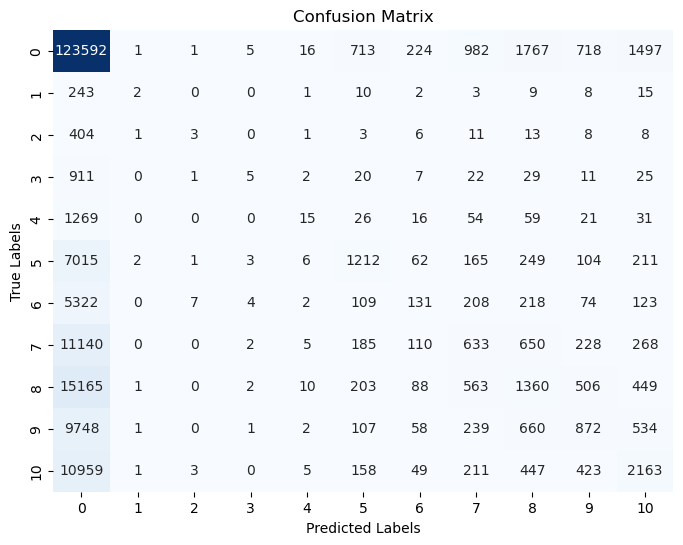

In [10]:
# Importamos librerias para la visualizacion de la matriz de confusion:
import seaborn as sns
import matplotlib.pyplot as plt

# Realizamos la prediccion
prediction = model_knn.predict(X_test)

# Mostramos la matriz de confusion para ver el desempeño del modelo
cm = confusion_matrix(y_test, prediction)

# visualizamos la matriz de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Podemos apreciar en la matriz que el modelo tiende a acertar más valores cercanos a 9-10 y en 0, pero del 1 a 4 parece que no tiene un buen rendimiento, lo más probable sea debido al desbalanceamiento de los datos.**

In [11]:
# Vamos a comprobar numericamente el resultado del entrenamiento del modelo
print("Resultado classification report:\n", classification_report(y_test, prediction))

# Precision en el conjunto de entrenamiento
train_accuracy = model_knn.score(X_train, y_train)
print("Accuracy Conjunto de entrenamiento:", train_accuracy)

# Precision en el conjunto de prueba
test_accuracy = model_knn.score(X_test, y_test)
print("Accuracy Conjunto de prueba:", test_accuracy)

Resultado classification report:
               precision    recall  f1-score   support

           0       0.67      0.95      0.78    129516
           1       0.22      0.01      0.01       293
           2       0.19      0.01      0.01       458
           3       0.23      0.00      0.01      1033
           4       0.23      0.01      0.02      1491
           5       0.44      0.13      0.21      9030
           6       0.17      0.02      0.04      6198
           7       0.20      0.05      0.08     13221
           8       0.25      0.07      0.11     18347
           9       0.29      0.07      0.11     12222
          10       0.41      0.15      0.22     14419

    accuracy                           0.63    206228
   macro avg       0.30      0.13      0.15    206228
weighted avg       0.53      0.63      0.54    206228

Accuracy Conjunto de entrenamiento: 0.6584225149956117
Accuracy Conjunto de prueba: 0.630312081773571


**Obtenemos un rendimineto general del 63% que no es muy elevado, esto es debido realmente al desbalanceo de las clases en las calificaciones(Ratings):** 
   - data_features["Book-Rating"].value_counts():
- [0]   --  647294
- [8]     -- 91804
- [10]    -- 71225
- [7]     -- 66402
- [9]     -- 60778
- [5]     -- 45355
- [6]     -- 31687
- [4]     --  7617
- [3]     --  5118
- [2]     --  2375
- [1]      -- 1481
- Name: Book-Rating, dtype: int64

podemos ver como las calificaciones con [0,5,6,7,8,9 y 10] han tenido mas valoraciones o interacciones de los usuarios, mientras que las calificaciones con [1,2,3 y 4] han tenido menores interacciones en nuetsros conjuntos de datos.

**No obstante, las clases que más abundan si estan siendo predecidas correctamente mediante este modelo, por lo que comprobaremos que sucede a la hora de validar las recomendaciones más adelante.**

## 3. Funcion de recomendacion y validacion de recomendaciones

**Continuamos con la parte final del proyecto, donde vamos a generar una funcion para definir las recomendaciones y luego mostraremos si se hacen efectivas con una validacion.**

In [12]:
# Vamos a realizar las recomendaciones y validarlas, para ello la eleccion de los usuarios se hara de manera aleatoria 
# y utilizaremos:
import random

# Construccion de la funcion de recomendacion
def libros_recomendados(num_users=4, num_recom_user=2):
    
    # Obtener una lista de usuarios unicos
    users = data['User-ID'].unique()

    # Seleccionar aleatoriamente usuaris
    random_users = random.sample(list(users), num_users)

    # Inicializamos un diccionario para almacenar las recomendaciones del usuario
    recom_dict = {}

    for user_id in random_users:
        # Obtenemos las interacciones del usuario en concreto
        user_data = data[data['User-ID'] == user_id]

        # Obtenemos libros que el usuario ya ha leido
        books_read = user_data['ISBN'].unique()

        # Relacionamos a los usuarios similares 
        similar_users = data[data['ISBN'].isin(books_read)]['User-ID'].unique()

        # Filtramos datos para saber las interacciones de los usuarios similares
        similar_users_data = data[data['User-ID'].isin(similar_users)]

        # Agrupamos y ordenamos los libros por la media de su calificacion
        book_ratings = similar_users_data.groupby('ISBN')['Book-Rating'].mean().sort_values(ascending=False)

        # Obtenemos los libros recomendados
        recom_books = book_ratings[~book_ratings.index.isin(books_read)].head(num_recom_user)

        # Obtenemos los titulos de libros recomendados para ser mas precisos
        recom_books_titles = books[books['ISBN'].isin(recom_books.index)]['Book-Title'].unique()

        # Guardamos las recomendaciones 
        recom_dict[user_id] = recom_books_titles

    return recom_dict

# Obtenemos las recomendaciones para los usuarios seleccionados
recomendaciones = libros_recomendados()

# Mostramos las recomendaciones para cada usuario especifico
for user_id, recom_books in recomendaciones.items():
    print(f"Recomendaciones de libros para el usuario {user_id}:\n")
    for i, book in enumerate(recom_books, 1):
        print(f"{i}. {book}")
    print("\n")

Recomendaciones de libros para el usuario 191239:

1. Helter Skelter: The True Story of the Manson Murders
2. Still Life With Woodpecker


Recomendaciones de libros para el usuario 204205:

1. Different Seasons
2. Hedge Witch: A Guide to Solitary Witchcraft


Recomendaciones de libros para el usuario 144105:

1. Talisman
2. Strange Dreams: Collected Stories and Drawings


Recomendaciones de libros para el usuario 66975:

1. PHP Essentials
2. The Tain: Translated from the Irish Epic Tain Bo Cuailnge




**Finalizamos nuestro proyecto tras ejecutar las recomendaciones para cada usuario especifico, y en este caso randomizado, como nos indicaba el ejercicio.**

In [14]:
# Elegimos el usuario segun las recomendaciones del ususario especifico de mas arriba
user_id = 144105

user = data[data['User-ID'] == user_id]

# Mostrar los libros leidos y valorados por el usuario
books_read_and_rated = user[user['Book-Rating'] > 0][['Book-Title', 'Book-Rating']]

print("Libros leidos y valorados por el usuario:", user_id)
print("\n", books_read_and_rated)

Libros leidos y valorados por el usuario: 144105

                                               Book-Title  Book-Rating
526493  Illusions: The Adventures of a Reluctant Messiah            8


**Esta ultima parte nos ayuda a tener algo más de información de cara a comprobar que el sistema funciona.**